# Unit 3 Final Project

Before you get started on your project, take a moment to review how you can make requests from the following APIs:
- **ESPN**
- **TikTok**
- **X**
- **Spotify**

First, you will need to set up your API credentials:
   - **Spotify**: `SPOTIFY_CLIENT_ID` and `SPOTIFY_CLIENT_SECRET` from https://developer.spotify.com/dashboard
   - **X (Twitter)**: `X_BEARER_TOKEN` from https://developer.twitter.com/en/portal/dashboard
   - **TikTok**: No authentication required!
   - **ESPN**: No authentication required!

In [2]:
# Import required libraries
import requests
import json
import random
import asyncio
import os

## 1. Spotify API - Random Song

In [ ]:
# Setup API authorization before making request
SPOTIFY_CLIENT_ID = "ADD YOUR ID HERE"
SPOTIFY_CLIENT_SECRET = "ADD YOUR SECRET HERE"

# Get access token
auth_response = requests.post('https://accounts.spotify.com/api/token', {
    'grant_type': 'client_credentials',
    'client_id': SPOTIFY_CLIENT_ID,
    'client_secret': SPOTIFY_CLIENT_SECRET,
})

auth_data = auth_response.json()
access_token = auth_data['access_token']

headers = {
    'Authorization': f'Bearer {access_token}'
}

In [25]:
# Search for a random popular track
search_query = random.choice(['pop', 'rock', 'hip hop', 'jazz', 'electronic'])
spotify_response = requests.get(
    'https://api.spotify.com/v1/search',
    headers=headers,
    params={'q': search_query, 'type': 'track', 'limit': 50}
)

print(spotify_response)
spotify_data = spotify_response.json()
print(spotify_data['tracks']['items'][0]['artists'][0]['name'])
print(spotify_data['tracks']['items'][0]['name'])

<Response [200]>
Brenda Lee
Rockin' Around The Christmas Tree


## 2. X (Twitter) API - Random Recent Post

In [27]:
# Setup API authorization before making request

X_BEARER_TOKEN = "ADD YOUR BEARER TOKEN HERE"

headers = {
    'Authorization': f'Bearer {X_BEARER_TOKEN}'
}

In [28]:
# Search for recent tweets about a random topic
search_topic = random.choice(['sports', 'technology', 'music', 'news', 'science'])
x_response = requests.get(
    'https://api.twitter.com/2/tweets/search/recent',
    headers=headers,
    params={
        'query': f'{search_topic} -is:retweet lang:en',
        'max_results': 10,
        'tweet.fields': 'created_at,public_metrics,author_id'
    }
)

x_data = x_response.json()
if 'data' in x_data and x_data['data']:
    random_tweet = random.choice(x_data['data'])
    print(f"\nRandom Tweet Found (Topic: {search_topic}):")
    print(f"  Text: {random_tweet['text'][:200]}...")
    if 'public_metrics' in random_tweet:
        print(f"  Likes: {random_tweet['public_metrics'].get('like_count', 0)}")
        print(f"  Retweets: {random_tweet['public_metrics'].get('retweet_count', 0)}")


Random Tweet Found (Topic: sports):
  Text: After dropping to No. 7 in the latest CFP rankings, Texas A&amp;M HC Mike Elko is asking for more clarity regarding the Aggies' surprising drop. https://t.co/o3GVk8ljpQ...
  Likes: 0
  Retweets: 0


## 3. TikTok API - Random Trending Video

*Note, this API will most likely only work when using a local version of Jupyter Notebooks because access to a browser like chromium.*

In [4]:
!pip install TikTokApi
!playwright install

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 57.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [TikTokApi]/4 [TikTokApi]]
Removing unused browser at /Users/soniaspindt/Library/Caches/ms-playwright/chromium-1140
Removing unused browser at /Users/soniaspindt/Library/Caches/ms-playwright/ffmpeg-1010
Removing unused browser at /Users/soniaspindt/Library/Caches/ms-playwright/firefox-1465
Removing unused browser at /Users/soniaspindt/Library/Caches/ms-playwright/webkit-2083
129.7 MiB [                    ] 0% 0.0s129.7 MiB [                    ] 0% 57.7s129.7 MiB [                    ] 0% 39.7s129.7 MiB [                    ] 0% 39.2s129.7 MiB [                    ] 0% 34.4s129.7 MiB [                    ] 0% 28.1s129.7 MiB [                    ] 0% 24.0s129.7 MiB [                    ] 0% 20.0s129.7 MiB [                    ] 0% 15.4s129.7 MiB [                    ] 1% 12.3s129.7 MiB [                    ] 1% 10.4s129.7 MiB [                    ] 2% 

In [7]:
from TikTokApi import TikTokApi

async def get_tiktok_video():
    async with TikTokApi() as api:
        await api.create_sessions(
            ms_tokens=[os.environ.get("ms_token")],
            num_sessions=1,
            sleep_after=3,
            headless=False  # ← Makes browser visible!
        )
        
        videos = []
        async for video in api.trending.videos(count=10):
            videos.append(video)
        
        if videos:
            video = random.choice(videos)
            print(f"Found video by @{video.author.username}")
            print(f"URL: https://www.tiktok.com/@{video.author.username}/video/{video.id}")

await get_tiktok_video()

Found video by @nne_hub
URL: https://www.tiktok.com/@nne_hub/video/7546892254019964215


## 4. ESPN API (Hidden) - Random Basketball Game

*Note, this API will most likely only work when using a local version of Jupyter Notebooks because the cloud permission settings appear to block ESPN.*

In [ ]:
espn_response = requests.get(
    'http://site.api.espn.com/apis/site/v2/sports/basketball/nba/scoreboard'
)

espn_data = espn_response.json()
espn_data

### 🚀 YOUR TURN! Design Your Own Study
Now it's time to use one of the APIs above to collect real data and answer your own question!

Instructions:
- **My Question:** Write a clear research question that requires concepts covered in Unit 3 to analyze.
- **My Study:** State the API you will be using. Then, describe how much data you will randomly collect from the API.
- **My Analysis:** Perform the analysis you need. Remember, a level 4 requires 3 different techniques to be included in your analysis.
- **My Answer:** Interpret your results. Tell me what I should conclude from the specific visualizations you make and the specific values you find.

# 📝 My Question

What is the average total score of an NFL football game in the 2023 and 2024 seasons, and how do they compare?

# 📊 My Study

*Describe your study design:*

- **What API are you using?** The ESPN API
- **What will you measure?** The total score (sum of score of individual teams) in an NFL game
- **How much data will you randomly sample from the API?** Given that there are 272 regular season games, I expect around 544 games

# 🔬 My Analysis

In [ ]:
import requests as rq
import statistics
import math

# Contiguous season ID ranges (inc, inc):
# 401547396, 401547669 - 2023 NFL season (274 games in total).
# 401671610, 401671889 - 2024 NFL season (280 games in total).
# Some IDs lie in chunks of 2-6 outside the contiguous ranges. No idea why that is, those IDs were ignored.

def get_total_score(event_id):
    """Returns (total_score, team1_score, team2_score) or None if invalid."""
    url = "https://site.api.espn.com/apis/site/v2/sports/football/nfl/summary"
    params = {"event": event_id}

    try:
        response = rq.get(url, params=params, timeout=5)
        data = response.json()

        competitions = data["header"]["competitions"]
        competitors = competitions[0]["competitors"]

        team1_score = int(competitors[0]["score"])
        team2_score = int(competitors[1]["score"])
        total_score = team1_score + team2_score

        return total_score, team1_score, team2_score

    except Exception:
        return None


def calculate_stats(scores):
    """Given a list of scores, return mean, standard error, margin of error, and 95% CI."""
    mean_score = statistics.mean(scores)
    std_dev = statistics.stdev(scores)
    print(std_dev)
    n = len(scores)
    std_err = std_dev / math.sqrt(n)
    
    z = 1.96  # For 95% confidence
    margin_of_error = z * std_err
    ci_low = mean_score - margin_of_error
    ci_high = mean_score + margin_of_error
    
    return mean_score, std_err, margin_of_error / mean_score, (ci_low, ci_high)


def collect_season_scores(start_id, end_id):
    scores = []
    for event_id in range(start_id, end_id + 1):
        result = get_total_score(event_id)
        if result is not None:
            total_score, _, _ = result
            scores.append(total_score)
    return scores


# 2023 season
scores_2023 = collect_season_scores(401547396, 401547669)
mean_2023, se_2023, me_2023, ci_2023 = calculate_stats(scores_2023)
print(f"2023 NFL Season: Mean total score = {mean_2023}, SE = {se_2023}, "
      f"Margin of Error = {me_2023}, 95% CI = {ci_2023}")

# 2024 season
scores_2024 = collect_season_scores(401671610, 401671889)
mean_2024, se_2024, me_2024, ci_2024 = calculate_stats(scores_2024)
print(f"2024 NFL Season: Mean total score = {mean_2024}, SE = {se_2024}, "
      f"Margin of Error = {me_2024}, 95% CI = {ci_2024}")

13.498877236251712
2023 NFL Season: Mean total score = 43.543795620437955, SE = 0.8154969973571458, Margin of Error = 0.03670727579085421, 95% CI = (41.94542150561795, 45.14216973525796)
13.146601405695135
2024 NFL Season: Mean total score = 45.73571428571429, SE = 0.785659705780129, Margin of Error = 0.03366937736468333, 95% CI = (44.19582126238524, 47.27560730904334)


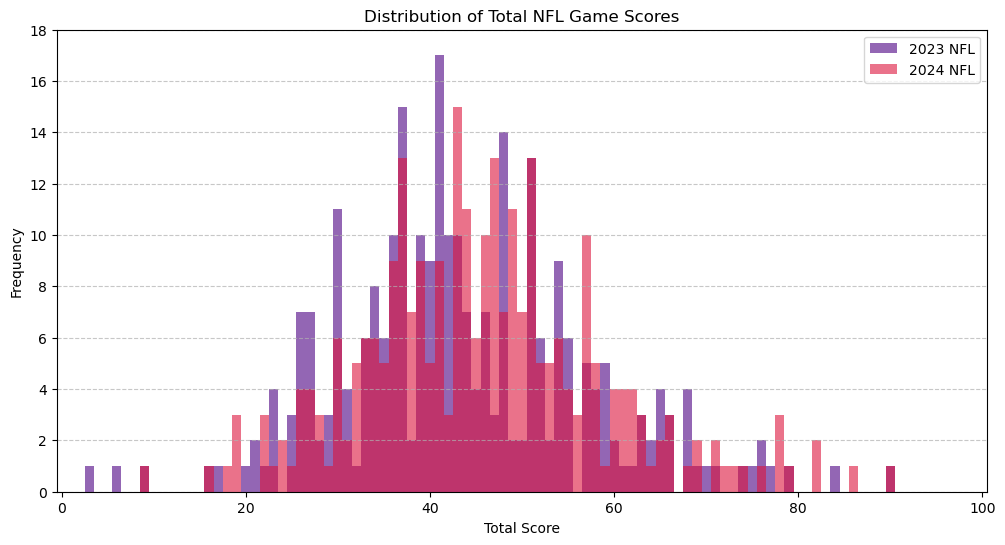

In [ ]:
# Raw histogram

import matplotlib.pyplot as plt

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for 2023 scores
plt.hist(scores_2023, bins=101, range=(-0.5, 100.5), alpha=0.6, color='indigo', label='2023 NFL')

# Histogram for 2024 scores
plt.hist(scores_2024, bins=101, range=(-0.5, 100.5), alpha=0.6, color='crimson', label='2024 NFL')

plt.title('Distribution of Total NFL Game Scores')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(-0.5, 100.5)
plt.ylim(0, 18)
plt.show()

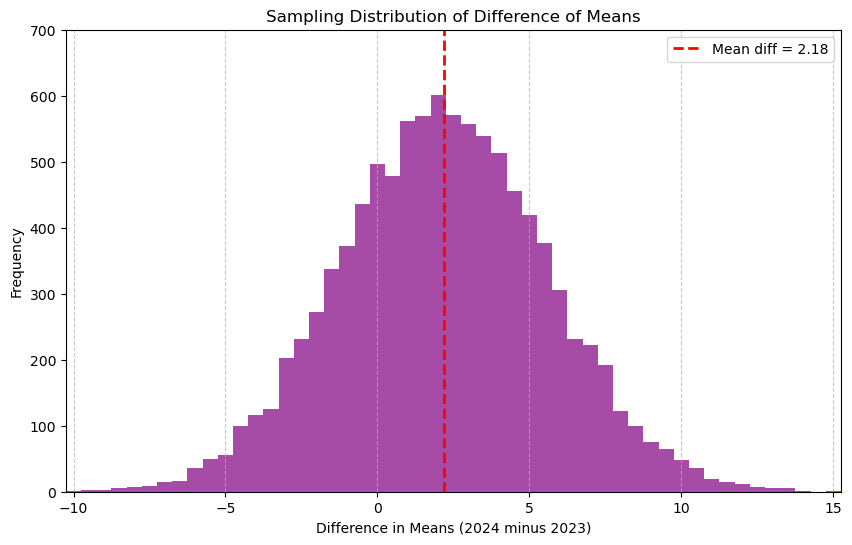

In [45]:
# Sampling distribution of the difference of means

import numpy as np

# Convert scores to numpy arrays
scores_2023 = np.array(scores_2023)
scores_2024 = np.array(scores_2024)

n_samples = 10000 # Number of sampling iterations
sample_size = 30

diff_means = []

for _ in range(n_samples):
    sample_2023 = np.random.choice(scores_2023, size=sample_size, replace=True)
    sample_2024 = np.random.choice(scores_2024, size=sample_size, replace=True)
    diff_means.append(np.mean(sample_2024) - np.mean(sample_2023))

diff_means = np.array(diff_means)

# Plot
plt.figure(figsize=(10,6))
plt.hist(diff_means, bins=51, range=(-10.25, 15.25), alpha=0.7, color='purple')
plt.axvline(np.mean(diff_means), color='red', linestyle='dashed', linewidth=2, label=f'Mean diff = {np.mean(diff_means):.2f}')
plt.title('Sampling Distribution of Difference of Means')
plt.xlabel('Difference in Means (2024 minus 2023)')
plt.ylabel('Frequency')
plt.xlim(-10.25, 15.25)
plt.ylim(0, 700)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# ✅ My Answer

The average total score of an NFL game in the 2023 season was around 43.5, with a 95% CI of 41.9-45.1, while that of an NFL game in the 2024 season was around 45.7, with a 95% CI of 44.2-47.3. The 95% CIs do overlap, which means I cannot definitively conclude that there was a difference in scoring between the two seasons. In addition, the unclear nature of how ESPN stores game data makes it likely that the means and CIs are inaccurate. The sampling distribution of the difference of means reveals a mean difference between any two games from the 2024 and 2023 seasons of around 2.18. The histogram for the sampling distribution of the difference of means contains notable fluctuations which do not seem to disappear with increasing number of samples (for example, spikes around 0 and 7, which also appear at n_samples = 1000 and 100000). This may be due to the fact that NFL scores tend to cluster around specific values, based on the number of points earned from touchdowns (6-7), field goals (3), and safeties (2).